# <font color='red'> <center> Tutorial 2 : Python for Data Science </font>
## <font color='red'> <center> Data Understanding using *Tips* dataset</font>
## <font color='red'> <center> 2020 - 2021</font>
    

---
### Lab 1 & 2: Important issues illustrated from a case study on *Tips* dataset: 
### - Section 1. Data and Objective understanding
### - Section 2. Descriptive statistics and Visualisation tools
### - Section 3. Your first model : Regression
### - Section 4. Some more analysis (to prepare with your mini-group partner)
---

# <font color='red'> Section 1. Data and objective understanding </font> 

–The Tips dataset– Food server’s tips in restaurants may be influenced by many factors (e.g. the
nature and location of the restaurant, the size of the party, the table location and the day of the week. . . ).
Restaurant managers need to know which factors matter when they assign tables to food servers. Indeed,
for the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component
of pay.
In one restaurant, a food server recorded some data on all customers they served during an interval
of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part
of a national chain and served a varied menu. In observance of local law the restaurant offered seating
in a non-smoking section to patrons who requested it. Each record includes a day and time, and thus
taken together, they show the server’s work schedule. The food server provided a comma-separated-value
file tips.csv containing 244 records, described by 7 variables ( total bill, tip, sex, smoker, day, time
and size).

In [1]:
# import useful libraries
import pandas as pd  # to manipulate dataframes, plots, ..
import matplotlib.pyplot as plt
import seaborn as sns # seaborn is an advanced library for visualization
import numpy as np
import scipy as sp

# to have figures in the current notebook you should add : %matplotlib inline
%matplotlib inline 


## Question 1

#### What do you know from the text above and what information is missing?

---
We can say that our problem is about supervised learning, because we have a target function which is the tip provided by customers to servers. The other attributes are the dependent variables(features).

---

### Question 2

Do you have some idea about the objectives of the study and the knowledge you could extract from the data? Could you suggest a list of questions of interest?

Here we want to know the influence of total bill, sex, smoker, day, time and size on tip by finding a model that can generalise the data.  

Some questions : 

    - What factors can most influence the tip value ?
    - Which factors matter when managers assign tables to food servers ?
    - We can create from the data a classification problem: will the customer give or not the tip ( by creating a new column basing on the tip column ( if tip<.. ==> no otheriwise ==> yes )
  

### Question 3

 Load the dataset and have a look at it using the describe() function. Describe the data (the format of the data, the quantity of data –number of example/ records and variable/fields–). What are the expected values and role of each variable?

In [2]:
# the code below loads the data 
data_tips=pd.read_csv('data/tips-new.csv')
# you can run the below code to see the first five observations 
data_tips


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
## let us first print out the types of variables as detected by Python
## notice that all categorical variables are considered as "objects" (i.e. String values) 
data_tips.dtypes



total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [4]:
# you can run the below code to see the first five observations 
data_tips.describe()

######## IMPORTANT NOTE ###############
## notice that the function describe() results statistics only for non-object variables
##

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
# this function should return a tuple of 3 values: 
#the class of your dataset object,
#the shape of the dataset and 
#the columns names
def answer_3():
    # write your code here:
    # the type of the object data_tips 
    dataset_type=type(data_tips)
    # the shape of data 
    shape=data_tips.shape
    #variables in data
    col_names=data_tips.columns
   
    return dataset_type,shape,col_names
    
answer_3()

(pandas.core.frame.DataFrame,
 (244, 7),
 Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object'))

## Learn more about values encoding, and checking/filling missing ou null values 
* https://pbpython.com/categorical-encoding.html
* https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/
* https://chartio.com/resources/tutorials/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe/
* https://www.datacamp.com/community/tutorials/categorical-data 

In [6]:
##In order to check null values in Pandas DataFrame, we use isnull() function 
##this function return dataframe of Boolean values which are True for NaN values.
data_tips.isnull()
#data_tips.isnull().sum()

,total_bill,tip,sex,smoker,day,time,size
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
239,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False
242,False,False,False,False,False,False,False


In [7]:
##Check for missing/null values : return the numbr of missing values in each column
data_tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [8]:
# a description for each variable :
# 'total_bill' : total to pay by the customer 
#'tip' : the tip value
#'sex' : the gender of the customer
#'smoker' :  customer smokes or not
#'day' : 4 days ( from thursday to sunday)
#'time' : either dinner or lunch
#'size' : the size of the party

### Question 4

Tip is usually referred to by percentage points, or as a rate. This enables a normalization over the total bill and a comparison of values across other variables. The question is now to create a "tip rate" variable and to add it to the original dataset.

In [9]:
#This function should return a dataframe including the new variable tip_rate
def answer_4():
    # write your code here
    data_tips['tip_rate']=data_tips['tip']/data_tips['total_bill']

    return data_tips
answer_4().tail()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204
243,18.78,3.00,Female,No,Thur,Dinner,2,0.159744


##### Home work

Explore the notion of scale of measurement. Provide a short note with meaningful definitions
and examples. Explain why it is important to consider the right scale for each variable.
What is the scale for each of the eight variables?

you can visit the link below to explore the notion of scale measurement:
http://stattrek.com/statistics/measurement-scales.aspx?Tutorial=AP

***
***
# <font color='red'> Section 2. Descriptive statistics and visualisation</font>
***

Descriptive statistics are statistics that quantitatively describe and summarise features of data: distribution, central tendency and dispersion. 



## <font color='red'> Section 2.1. Univariate statistics: describing a single variable </font>

Univariate statistics involve only one variable. The appropriate statistic depends on the level of measurement. This analysis provides a summary statistics section, or also called an exploratory data analysis.
- Nominal variables are described by frequency table and mode(s). 
- For ordinal variables the median can be calculated as a measure of central tendency and the range as a measure of dispersion. 
- For interval level variables, the mean, median, and mode are used to characterize the central tendency, quantiles characterize distribution, range and measures of spread such as the variance and standard deviation are used to characterize dispersion. 
- For ratio level variables, the geometric mean and harmonic mean can be used as measures of central tendency and the coefficient of variation as a measure of dispersion. F
- or interval and ration level variables the shape of the distribution may also be described via indices such as skewness and kurtosis. 

**Plots are usefull tools to show the distribution for all types of variable.**

### Question 5

Explore univariate summaries with the describe( ) function.

Notice that for object features (e.g. strings or timestamps) the result of *descibe* will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency. Learn more about the describe( ) function here : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html

In [10]:
## let us first print out the types of variables as detected by Python
## notice that all categorical variables are considered as "objects" (i.e. String values) 
data_tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
tip_rate      float64
dtype: object

In [11]:
#This function should return summary about numerical and categorical features
# use the output of answer4() for your this question
def answer_5():
    # write your code here:
    num_des=answer_4().describe() ## statistics only for numerical features
    cate_des=answer_4().describe(include = 'object') ## explicitly ask to do statistics for object (string) features
    return num_des,cate_des
    #return cate_des
answer_5()

(       total_bill         tip        size    tip_rate
 count  244.000000  244.000000  244.000000  244.000000
 mean    19.785943    2.998279    2.569672    0.160803
 std      8.902412    1.383638    0.951100    0.061072
 min      3.070000    1.000000    1.000000    0.035638
 25%     13.347500    2.000000    2.000000    0.129127
 50%     17.795000    2.900000    2.000000    0.154770
 75%     24.127500    3.562500    3.000000    0.191475
 max     50.810000   10.000000    6.000000    0.710345,
          sex smoker  day    time
 count    244    244  244     244
 unique     2      2    4       2
 top     Male     No  Sat  Dinner
 freq     157    151   87     176)

### Question 6

Plot a representation of the days distribution in the dataset and comment.

<AxesSubplot:xlabel='day', ylabel='count'>

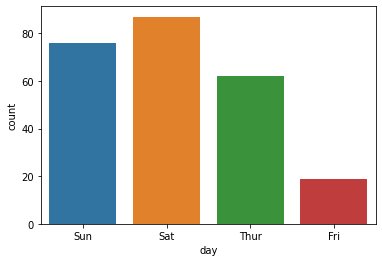

In [12]:
# this function should return a plot of the days distribution, give a comment below your plot
def answer_6():
    # write your code here
    return sns.countplot(x='day',data=data_tips)
answer_6()   

<mark>Let your comment here:</mark> Clearly, there are less females that pay the bill than males, less smokers than non-smokers, most parties occur on week-ends and friday has very few parties (please confirm with your own figures), and there are much more dining parties at night than during the day.

##  <font color='red'> Section 2.2. Bivariate statistics: describing correlation between two variables </font>

- Bivariate analysis involves the analysis of two variables for the purpose of determining the empirical relationship between them. 

- Common forms involve creating a percentage table, a scatterplot graph and computing a simple correlation coefficient. 

- The types of analysis for a particular pair of variables should be done in accordance with the level of measurement of the two variables.


### Question 7 

Prepare a plot of the amount of tips against the total bill. What can you see ? Test the correlation
between the two variables.


Notice : **sns.regplot( )** function is used to plot data and a linear regression model fit.

We can say from the figure below that tip correlate strongly with the total_bill. As shown  we can draw a line that can approximate the relationship between them.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

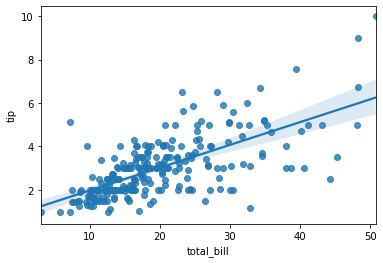

In [13]:
# this function should return a plot of tips against the total_bill
def answer_7(): 
    # write your code here
    ax = sns.regplot(x="total_bill", y="tip", data=data_tips)
    return ax
answer_7()

***
## Examine the linear relationship between variables (Pearson)
Use the Pearson correlation coefficient to examine the strength and direction of the linear relationship between two continuous variables.


The correlation coefficient can range in value from −1 to +1. The larger the absolute value of the coefficient, the stronger the relationship between the variables.

For the Pearson correlation, an absolute value of 1 indicates a perfect linear relationship. A correlation close to 0 indicates no linear relationship between the variables. 

## Determine whether the correlation coefficient is significant

To determine whether the correlation between variables is significant, compare the p-value to your significance level. Usually, a significance level (denoted as α or alpha) of 0.05 works well. An α of 0.05 indicates that the risk of concluding that a correlation exists—when, actually, no correlation exists—is 5%. The p-value tells you whether the correlation coefficient is significantly different from 0. (A coefficient of 0 indicates that there is no linear relationship.)   So, for α=0.05
- P-value ≤ α: The correlation is statistically significant
If the p-value is less than or equal to the significance level, then you can conclude that the correlation is different from 0.
- P-value > α: The correlation is not statistically significant
If the p-value is greater than the significance level, then you cannot conclude that the correlation is different from 0.

Let us apply this method to find the correlation and the significance between tips and total_bill features :
*To do this, we use the library **scipy.stats** that contains a large number of probability distributions as well as a growing library of statistical functions.*

In [14]:
# these lines of code tests the correlation between our two variables: total_bill and tip
from scipy.stats import pearsonr,spearmanr
pearsonr(data_tips['tip'],data_tips['total_bill'])

(0.6757341092113645, 6.692470646863477e-34)

In [15]:
# seconde way to test correlation using spearmanr test. The difference between spearmanr and pearsonr test is that spearmanr can
# be used for ordinal features also. Visit the link given above for more info.
spearmanr(data_tips['tip'],data_tips['total_bill'])

SpearmanrResult(correlation=0.6789681219001009, pvalue=2.501158440923619e-34)


<mark> The statistical test for the correlation is significant because the  p-value is less than 0.05 </mark>

We can say that  tip correlate strongly with the total_bill. As shown above we can draw a line that can approximate the relationship between them.


For more information about test for correlation, you can visit the web page : http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/how-to/correlation/interpret-the-results/

**Notice**: The Pearson correlation coefficient is the most widely used. It measures the strength of the linear relationship between normally distributed variables. When the variables are not normally distributed or the relationship between the variables is not linear, it may be more appropriate to use the Spearman rank correlation method.
There is a very interesting paper about the differences between these two correlation coefficients on the same sets of data:
http://geoinfo.amu.edu.pl/qg/archives/2011/QG302_087-093.pdf

***

## Understanding boxplots

Boxplots are represented as follows: <img src="data/boxplot.png" width=700 height=700 />
Here are some links to learn more about boxplots :
 * https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51 
 * https://seaborn.pydata.org/generated/seaborn.boxplot.html


### Question 8
Draw and interpret three boxplots : 

    1. the distribution of the total bill,
    2. the distribution of tips;
    3. the distributions of tips vs. days.
    
   

/Users/linafahed/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/linafahed/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/Users/linafahed/opt/anaconda3/lib/python3.8/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


(<AxesSubplot:xlabel='total_bill'>,
 <AxesSubplot:xlabel='tip'>,
 <AxesSubplot:xlabel='tip_rate'>,
 <AxesSubplot:xlabel='tip', ylabel='day'>,
 <AxesSubplot:xlabel='tip_rate', ylabel='day'>)

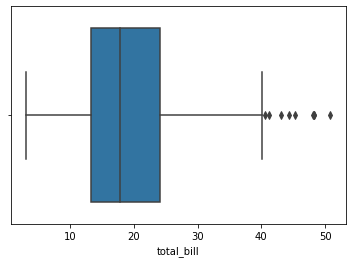

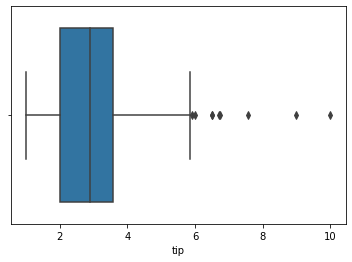

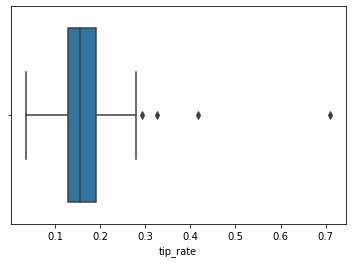

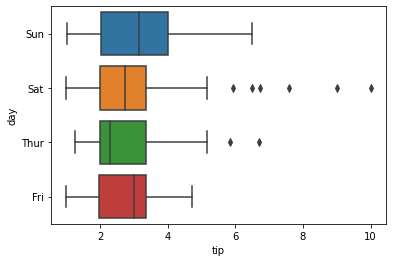

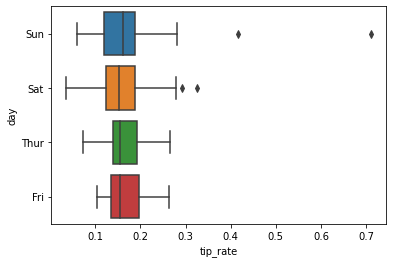

In [16]:
def answer_8():
    # write your code here
    plt.figure()
    boxplot_total_bill = sns.boxplot(x= 'total_bill',data=data_tips,orient='v')
    plt.figure()
    boxplot_tip =sns.boxplot(x= 'tip',data=data_tips,orient='v')
    plt.figure()
    boxplot_tip_rate =sns.boxplot(x= 'tip_rate',data=data_tips,orient='v')## tiprate is more important than tip
    plt.figure()
    boxplot_tip_vs_day = sns.boxplot(x= 'tip',y='day',data=data_tips)
    plt.figure()
    boxplot_tip_rate_vs_day = sns.boxplot(x= 'tip_rate',y='day',data=data_tips)
    return boxplot_total_bill,boxplot_tip,boxplot_tip_rate,boxplot_tip_vs_day,boxplot_tip_rate_vs_day
answer_8()

Summary Statistics:
- Clearly some outliers can be observed, especially on saturday and tips’s rate. Some further investi- gation is needed.
- The tips at the restaurant are around 15-16% of the bill, with fairly low total bills in average (a little under \\$20). The shape of the data is skewed to the right. 
- All in all, it is possible to conclude that the restaurant is not expensive. However note that the max values for total_bill and tip_rate are far from the mean and median values. We have to explore these cases. It indicates possible outliers (remember: no missing values, no obvious errors in format and values does not mean no issues).


<mark>Comment more the above boxplots... Let your comment here: 
- The presence of outliers in all plots<mark>

### Question 9

Draw an histogram of tips. What can you say about the shape of the data ? Is this restaurant
expensive ?  plot 6 histograms with increasing numbers of breaks.

Learn more about histograms in the matplot package here : https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html


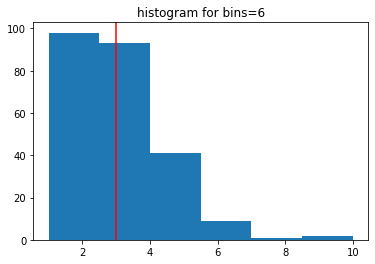

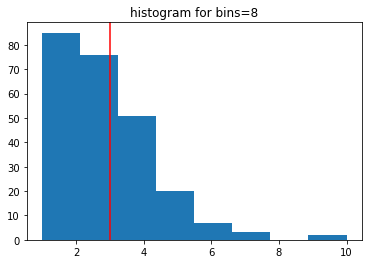

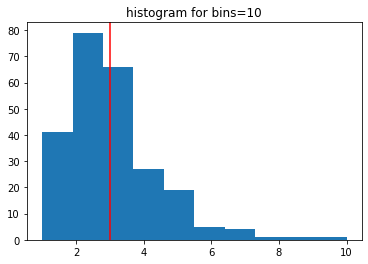

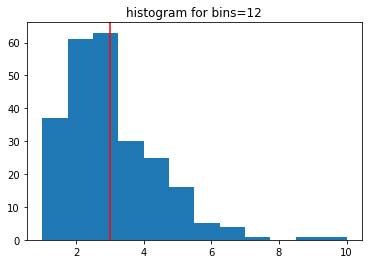

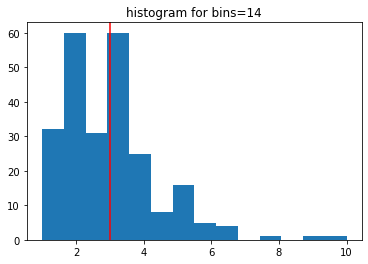

In [17]:
#in histograms, "bin" parameter is set to 10 by default
# bin defines the number of equal-width bins in the range.
def answer_9():
    # write your code here
    #plt.subplot(nrows=2,ncols=3)
    for i in range(6,16,2):
        plt.figure()
        plt.hist(x='tip',data=data_tips,bins=i)
        plt.axvline(data_tips['tip'].mean(),color='red') # add the mean value of tip to our plots
        plt.title('histogram for bins='+str(i))
answer_9()

<mark>For bins=10 : The distribution is quite normal but presents some skewness to the right(positive skew)</mark>
For bin = 14, we get a a bimodal histogram (it is just a histogram with two obvious relative modes, or data peaks)

The 1\\$ bin size shows that the distribution of tips is skewed to the right, which shows that most tips are low, around 2-3\\$, and that there are few larger tips. There is an interesting fact that appears with the 0.1\\$ bin size where the distribution is bimodal with peaks at full dollar and half-dollar and let us think that there is a tendency to round the tips.

### Question 10

Display the counts (proportions) for Gender of the Bill Payer and Smoking Parties. Do the same
for time of the day (dinner or lunch) and day of the week

(<AxesSubplot:ylabel='smoker'>, <AxesSubplot:ylabel='day'>)

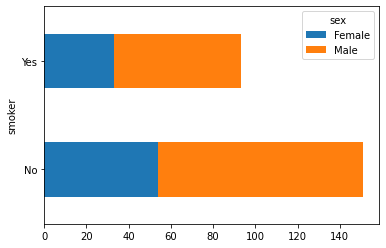

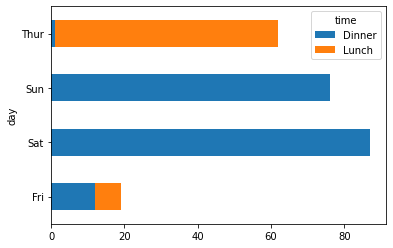

In [18]:
def answer_11():
    # write your code here
    ax1=pd.crosstab(data_tips.smoker,data_tips.sex).plot.barh(stacked=True)
    ax2=pd.crosstab(data_tips.day,data_tips.time).plot.barh(stacked=True)

    return ax1,ax2
answer_11()

### Question 11

Who pay mostly the bills ? men or women ? and when ? Try to visualise the conditional distributions
of Sex given the day of the week, with a mosaic plot

(<Figure size 432x288 with 3 Axes>,
 {('Sun', 'Female'): (0.0, 0.0, 0.3068723249616409, 0.2360552544151075),
  ('Sun', 'Male'): (0.0,
   0.23937751355132011,
   0.3068723249616409,
   0.7606224864486798),
  ('Sat', 'Female'): (0.3117984333360252,
   0.0,
   0.35128805620608894,
   0.32076984763432237),
  ('Sat', 'Male'): (0.3117984333360252,
   0.324092106770535,
   0.35128805620608894,
   0.6759078932294649),
  ('Thur', 'Female'): (0.6680125979164984,
   0.0,
   0.250343212468707,
   0.5144143178651805),
  ('Thur', 'Male'): (0.6680125979164984,
   0.5177365770013931,
   0.250343212468707,
   0.48226342299860675),
  ('Fri', 'Female'): (0.9232819187595896,
   0.0,
   0.07671808124041025,
   0.472110508830215),
  ('Fri', 'Male'): (0.9232819187595896,
   0.47543276796642764,
   0.07671808124041025,
   0.5245672320335724)})

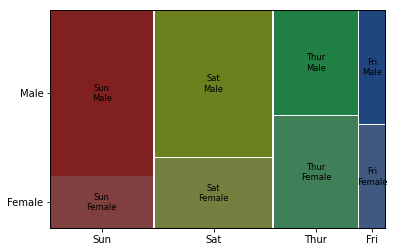

In [19]:
from statsmodels.graphics.mosaicplot import mosaic
def answer_12():
    ax=mosaic(data_tips,['day','sex'])
    
    return ax 

answer_12()
# men pay mostly and  on Sunday

You can explore more nice plots  with the seaborn library: http://seaborn.pydata.org/tutorial/categorical.html

/Users/linafahed/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


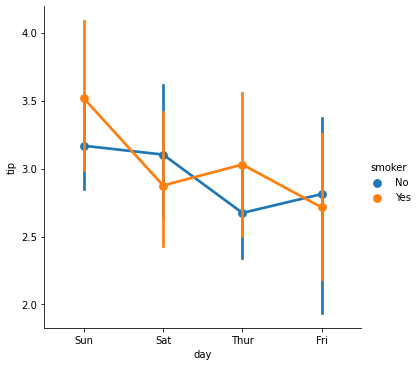

In [20]:
sns.factorplot(x="day", y="tip", hue="smoker", data=data_tips)  
# estimator is the mean among each day

/Users/linafahed/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


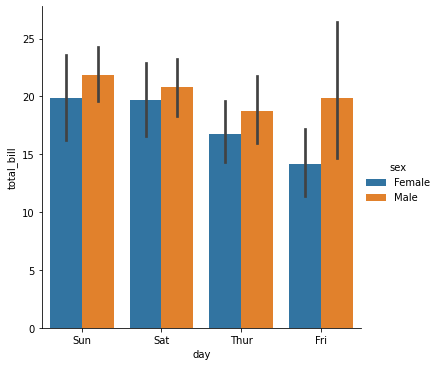

In [21]:
sns.factorplot(x="day", y="total_bill", hue="sex", data=data_tips, kind="bar")

 the plot above shows that Male pay mostly the bills, especially on Sunday
 
 
 <mark>**How to well communicate summary statistics?**
    
    
<mark> - the summary statistics section should be clear and easy to read: state total number of cases, and number of variables. Tables need to have captions, and are separated by realvalued variables and categorical variables. <mark>

<mark> - Tabulate the numbers. Ordering can be considered, for example tiprate is the first row since we believe it to be the variable of most interest (the target). <mark>
    
<mark> -  Numbers are carefully rounded, so that it is easy to skim over the tables and get a quick sense of the patterns. Graphical representations are also useful to carefully analyse the data (and to enhance the summary report). <mark>
    
    
<mark> - Bar, pie, histogram and box plots are illustrated in the code. . . <mark>

***
***

#  <font color='red'> Section 3. Your first model: a simple regression</font>

The main idea of simple linear regression is to set the value of a quantitative variable Y with a quantitative explanatory variable x: *E*(Y|x) = β0 +β1 x where β0 and β1 are called parameters "betas" or "coefficients" of the model. This defines a linear relationship, on average (linearity assumption). The intercept, β0, is the (population) mean of Y when x = 0, and the slope, β1, is the (population) mean change in Y when x increases by 1. Multiple regression consider several explanatory variables. .


In [22]:
#First, import some libraries. 
#We use statsmodels.api.OLS for the linear regression since it contains a much more detailed 
#report on the results of the fit than sklearn.linear_model.LinearRegression.
# visit for useful info about OLS : http://efavdb.com/interpret-linear-regression/
import statsmodels.formula.api as sm

You can find useful description of regressions models in the statmodels library here : https://www.statsmodels.org/dev/examples/index.html#linear-regression-models


## Dummy Variables



A dummy variable is a numerical variable used in regression analysis to represent subgroups of the sample in your study. In research design, a dummy variable is often used to distinguish different treatment groups.

In the simplest case, we would use a 0,1 dummy variable where a person is given a value of 0 if they are in the control group or a 1 if they are in the treated group. Dummy variables are useful because they enable us to use a single regression equation to represent multiple groups. This means that we don’t need to write out separate equation models for each subgroup. The dummy variables act like ‘switches’ that turn various parameters on and off in an equation. 

Another advantage of a 0,1 dummy-coded variable is that even though it is a nominal-level variable you can treat it statistically like an interval-level variable (if this made no sense to you, you probably should refresh your memory on levels of measurement). 

Learn more about it here : https://conjointly.com/kb/dummy-variables/


### Question 13 
Before starting with the regression, we will learn how to build dummy variables, which is sometimes
useful. Create four new variables, named day_Thur, day_Fri, day_Sat, day_Sun, that take 1 if the dining party was held on that day, 0 otherwise. 

Notice that the new variables are considered as numerical, however we need to consider them as objects (boolean).. 


In [23]:
#this function should return a dataframe including the dummies for 'day','sex','smoker' and 'time'
def answer_13():
    # write your code here:
    data_tips=answer_4()
    res= pd.get_dummies(data_tips,columns=['day','sex','smoker','time'])
    #result=res.ix[:, 'day_Fri':].astype('object')
    #result2=pd.concat([answer_13().ix[:,'total_bill':'tip_rate'],result],axis=1)
    return res
answer_13()


,total_bill,tip,size,tip_rate,day_Fri,day_Sat,day_Sun,day_Thur,sex_Female,sex_Male,smoker_No,smoker_Yes,time_Dinner,time_Lunch
0,16.99,1.01,2,0.059447,0,0,1,0,1,0,1,0,1,0
1,10.34,1.66,3,0.160542,0,0,1,0,0,1,1,0,1,0
2,21.01,3.50,3,0.166587,0,0,1,0,0,1,1,0,1,0
3,23.68,3.31,2,0.139780,0,0,1,0,0,1,1,0,1,0
4,24.59,3.61,4,0.146808,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0.203927,0,1,0,0,0,1,1,0,1,0
240,27.18,2.00,2,0.073584,0,1,0,0,1,0,0,1,1,0
241,22.67,2.00,2,0.088222,0,1,0,0,0,1,0,1,1,0
242,17.82,1.75,2,0.098204,0,1,0,0,0,1,1,0,1,0


In [24]:
# answer13() provides a dataframe where the new columns are considered as float which is not true
#the following lines of codes will resolve the problem for you.
#from now use the dataframe 'data'.
result=answer_13().loc[:, 'day_Fri':].astype('object') ## i.e. consider as object, all variables from day_Fri till the end
data=pd.concat([answer_13().loc[:,'total_bill':'tip_rate'],result],axis=1)


<mark> We have seen the **loc** function before. However you can learn more about it here Learn more about **loc** function here https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html 
    <mark> 
        
        
 Let us now verify that the new variables are now considered by Python as Objects, let us print out the data types       

In [25]:
data.dtypes

total_bill     float64
tip            float64
size             int64
tip_rate       float64
day_Fri         object
day_Sat         object
day_Sun         object
day_Thur        object
sex_Female      object
sex_Male        object
smoker_No       object
smoker_Yes      object
time_Dinner     object
time_Lunch      object
dtype: object

### Question 14: a general model, impact of all variables on the tip_rate

Fit a general linear model with tip_rate as a response variable against all the other variables of
interest : sex, smoker, time, size, day_Thur, day_Fri, day_Sat, day_Sun

Here we will use the OLS (Ordinary Least Squares) method. OLS is a common technique used in analyzing linear regression. In brief, it compares the difference between individual points in your data set and the predicted best fit line to measure the amount of error produced. 

The formula parameter (see code below) is provided as a string, in the following form: **dependent variable ~ list of independent variables separated by the + symbol**. In plain terms, the dependent variable is the factor you are trying to predict, and on the other side of the formula are the variables you are using to predict.

Learn more here : https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a

In [26]:
# this function should fit a general model respecting the requirements 
#and return a summary about that model
#( use :  your_model.summary())
## fit function  uses the model to create a best fit line, hence the linear regression
def answer_14():
    #answer_13()
    model=sm.ols(formula="data.tip_rate~data.sex_Female +data.sex_Male+ data.smoker_No+data.smoker_Yes +data.time_Dinner+data.time_Lunch + data['size'] + data.day_Fri + data.day_Thur + data.day_Sun + data.day_Sat ",data=data).fit()
    return model.summary()
answer_14()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          data.tip_rate   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.479
Date:                Sun, 28 Mar 2021   Prob (F-statistic):              0.175
Time:                        20:32:39   Log-Likelihood:                 341.67
No. Observations:                 244   AIC:                            -667.3
Df Residuals:                     236   BIC:                            -639.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0697      0.004     15.784      0.000       0.061       0.078
data.sex_Female[T.1]      0.0391      0.005      8.177      0.000       0.030       0.049
data.sex_Male[T.1]        0.0306      0.005      6.559      0.000       0.021       0.040
data.smoker_No[T.1]       0.0330      0.005      6.751      0.000       0.023       0.043
data.smoker_Yes[T.1]      0.0367      0.005      7.829      0.000       0.027       0.046
data.time_Dinner[T.1]     0.0232      0.012      1.856      0.065      -0.001       0.048
data.time_Lunch[T.1]      0.0465      0.014      3.330      0.001       0.019       0.074
data.day_Fri[T.1]         0.0182      0.011      1.587      0.114      -0.004       0.041
data.day_Thur[T.1]     6.167e-05      0.018      0.003      0.997      -0.036       0.036
data.day_Sun[T.1]         0.0349      0.012      2.981      0.003       0.012       0.058
data.day_Sat[T.1]         0.0165      0.011      1.459      0.146      -0.006       0.039
data['size']             -0.0096      0.004     -2.282      0.023      -0.018      -0.001
==============================================================================
Omnibus:                      214.408   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7088.439
Skew:                           3.189   Prob(JB):                         0.00
Kurtosis:                      28.623   Cond. No.                     3.69e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.84e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

To learn how to interpret the summary results (the output) of such regression models, take a look here : https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a

### Interpreting Linear Regression Through statsmodels .summary()
Let us interpret the output of the summary() shown above:
- The top of our summary starts by giving us a few details we already know. Our **Dependent Variable** is *tip_rate*, we’ve using OLS known as Ordinary Least Squares, and the Date and Time we’ve created the Model. 
- Next, it details our **Number of Observations** in the dataset. 
- Df Residuals is another name for our Degrees of Freedom in our mode. This is calculated in the form of ‘n-k-1’ or ‘number of observations-number of predicting variables-1.’ Df Model numbers our predicting variables. 
- Our **Covariance Type** is listed as nonrobust. Covariance is a measure of how two variables are linked in a positive or negative manner, and a robust covariance is one that is calculated in a way to minimize or eliminate variables, which is not the case here.


- **R-squared** is possibly the most important measurement produced by this summary. R-squared is the measurement of how much of the independent variable is explained by changes in our dependent variables. In percentage terms, 0.042 would mean our model explains 4.2% of the change in our ‘tip_rate’ variable. 
- **Adjusted R-squared** is important for analyzing multiple dependent variables’ efficacy on the model. Linear regression has the quality that your model’s R-squared value will never go down with additional variables, only equal or higher. Therefore, your model could look more accurate with multiple variables even if they are poorly contributing. The adjusted R-squared penalizes the R-squared formula based on the number of variables, therefore a lower adjusted score may be telling you some variables are not contributing to your model’s R-squared properly.
- The **F-statistic** in linear regression is comparing your produced linear model for your variables against a model that replaces your variables’ effect to 0, to find out if your group of variables are statistically significant. To interpret this number correctly, using a chosen alpha value and an F-table is necessary. 
- **Prob (F-Statistic)** uses this number "F-Statistic" to tell you the accuracy of the null hypothesis, or whether it is accurate that your variables’ effect is 0. In this case, it is telling us 0.175% chance of this. 
- **Log-likelihood** is a numerical signifier of the likelihood that your produced model produced the given data. It is used to compare coefficient values for each variable in the process of creating the model. 
- **AIC and BIC** are both used to compare the efficacy of models in the process of linear regression, using a penalty system for measuring multiple variables. These numbers are used for feature selection of variables.


- The **Intercept** is the result of our model if all variables were tuned to 0. In the classic ‘y = mx+b’ linear formula, it is our b, a constant added to explain a starting value for our line. Beneath the intercept are our variables. 
- Our first informative column is the **coefficient**. For our intercept, it is the value of the intercept. For each variable, it is the measurement of how change in that variable affects the independent variable. It is the ‘m’ in ‘y = mx + b’ One unit of change in the dependent variable will affect the variable’s coefficient’s worth of change in the independent variable. If the coefficient is negative, they have an inverse relationship. As one rises, the other falls.
- Our **std error** is an estimate of the standard deviation of the coefficient, a measurement of the amount of variation in the coefficient throughout its data points. The t is related and is a measurement of the precision with which the coefficient was measured. A low std error compared to a high coefficient produces a high t statistic, which signifies a high significance for your coefficient.
- **P>|t|** is one of the most important statistics in the summary. It uses the t statistic to produce the p value, a measurement of how likely your coefficient is measured through our model by chance. The p value of 0.023 for "size" is saying there is a 2.3% chance the "size" variable has no affect on the dependent variable, tip_rate, and our results are produced by chance. Proper model analysis will compare the p value to a previously established alpha value, or a threshold with which we can apply significance to our coefficient. A common alpha is 0.05, which few of our variables pass in this instance.
- **$[$0.025 and 0.975$]$** are both measurements of values of our coefficients within 95% of our data, or within two standard deviations. Outside of these values can generally be considered outliers.
- Omnibus describes the normalcy of the distribution of our residuals using skew and kurtosis as measurements. A 0 would indicate perfect normalcy. 
- Prob(Omnibus) is a statistical test measuring the probability the residuals are normally distributed. A 1 would indicate perfectly normal distribution. 
- Skew is a measurement of symmetry in our data, with 0 being perfect symmetry. Kurtosis measures the peakiness of our data, or its concentration around 0 in a normal curve. Higher kurtosis implies fewer outliers.
- **Durbin-Watson** is a measurement of homoscedasticity, or an even distribution of errors throughout our data. Heteroscedasticity would imply an uneven distribution, for example as the data point grows higher the relative error grows higher. Ideal homoscedasticity will lie between 1 and 2. 
- **Jarque-Bera (JB) and Prob(JB)** are alternate methods of measuring the same value as Omnibus and Prob(Omnibus) using skewness and kurtosis. We use these values to confirm each other. 
- **Condition number** is a measurement of the sensitivity of our model as compared to the size of changes in the data it is analyzing. Multicollinearity is strongly implied by a high condition number. Multicollinearity a term to describe two or more independent variables that are strongly related to each other and are falsely affecting our predicted variable by redundancy.


### Question 15: impact of the *size* on the *tip_rate*

Fit a model with only the size as an explanatory variable

In [27]:
def answer_15():
    #write your code here
    #data_tips=answer_13()
    model=sm.ols(formula="data.tip_rate~data['size']",data=data).fit()    
    return model.summary()

answer_15()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          data.tip_rate   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     5.042
Date:                Sun, 28 Mar 2021   Prob (F-statistic):             0.0256
Time:                        20:32:39   Log-Likelihood:                 338.95
No. Observations:                 244   AIC:                            -673.9
Df Residuals:                     242   BIC:                            -666.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1844      0.011     16.475      0.000       0.162       0.206
data['size']    -0.0092      0.004     -2.245      0.026      -0.017      -0.001
==============================================================================
Omnibus:                      220.122   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7618.220
Skew:                           3.308   Prob(JB):                         0.00
Kurtosis:                      29.562   Cond. No.                         8.85
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let comment here : It is still a non significant model. From the R-sequared we may infer that the variable "size" explains only 2% of the variation of the tip rate. 

### Question 16: finding & selecting a *good model*

Use a stepwise algorithm with the AIC statistic as a variable selection process to select a good
model. Start from the full model of question 13. What do you remark?

In [28]:
# this function is provided since there is no specific method for aicstatistic in python
# the source code was taken from : http://planspace.org/20150423-forward_selection_with_statsmodels/
import statsmodels.formula.api as smf

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} ".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} ".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

In [29]:
#data.head(1)

In [30]:
def answer_16():
    data_new=data.iloc[:,2:12]
    model = forward_selected(data_new, 'tip_rate')
    return  model.model.formula ,model.rsquared_adj
answer_16()

('tip_rate ~ size + day_Sat ', 0.0222430889056362)

Let comment here : We see that we retrieve the two most significant variables. The model with the two resulting variables is, however, still not significant.

#### Home work

Explore the notion of interaction between the Gender and the smoking habit by including
explicitely this interaction into a model with size, sex, smoke

### Question 17: impact of *total bill* on the *tip_rate*

Check the linear relationship between the tip and the total bill, seen at question 7, with a linear
model and interpret the quality of this model

In [31]:

def answer_17():
    # write your code here
    model=sm.ols(formula="data.tip_rate~data.total_bill",data=data).fit()
    return model.summary()
answer_17()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          data.tip_rate   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     31.34
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           5.85e-08
Time:                        20:32:39   Log-Likelihood:                 351.29
No. Observations:                 244   AIC:                            -698.6
Df Residuals:                     242   BIC:                            -691.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.2068      0.009     22.975      0.000       0.189       0.224
data.total_bill    -0.0023      0.000     -5.599      0.000      -0.003      -0.002
==============================================================================
Omnibus:                      224.802   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7863.442
Skew:                           3.420   Prob(JB):                         0.00
Kurtosis:                      29.957   Cond. No.                         53.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Let comment here:

### Question 18: impact of both *total bill* and *size* on the *tip_rate*

 Test the correlation between total_bill and size? what do you conclude?

In [32]:
def answer_18_1():
    corr=spearmanr(data['size'],data['total_bill'])

    return corr
answer_18_1()

SpearmanrResult(correlation=0.6047911390994543, pvalue=9.92230778131113e-26)

<mark>Conclusion: size correlates with total_bill.</mark> So let us see if both variables impact tip_rate

Now build a linear model using both size and total_bill, the show the summary. What do you remark about the results? ( to help 
go back to answer_17() and answer_15() )

In [33]:
def answer_18_2():
    model=sm.ols(formula="data.tip_rate~data.total_bill+data['size']",data=data).fit()
    return model.summary()

answer_18_2()

    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          data.tip_rate   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     16.47
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           1.98e-07
Time:                        20:32:39   Log-Likelihood:                 352.06
No. Observations:                 244   AIC:                            -698.1
Df Residuals:                     241   BIC:                            -687.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1990      0.011     18.108      0.000       0.177       0.221
data.total_bill    -0.0027      0.001     -5.229      0.000      -0.004      -0.002
data['size']        0.0060      0.005      1.234      0.218      -0.004       0.016
==============================================================================
Omnibus:                      225.635   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7911.374
Skew:                           3.440   Prob(JB):                         0.00
Kurtosis:                      30.034   Cond. No.                         67.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

To improve the previous results, try to add a term composed of a multiplication of the variales total_bill and size to your formula

In [34]:
def answer_18_3():
    model=sm.ols(formula="data.tip_rate~data.total_bill+data['size']+(data.total_bill)*(data['size'])",data=data).fit()
    
    return model.summary()
answer_18_3()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          data.tip_rate   R-squared:                       0.138
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     12.82
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           8.44e-08
Time:                        20:32:39   Log-Likelihood:                 354.57
No. Observations:                 244   AIC:                            -701.1
Df Residuals:                     240   BIC:                            -687.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        0.2582      0.029      9.009      0.000       0.202       0.315
data.total_bill                 -0.0053      0.001     -4.186      0.000      -0.008      -0.003
data['size']                    -0.0176      0.012     -1.518      0.130      -0.040       0.005
data.total_bill:data['size']     0.0009      0.000      2.234      0.026       0.000       0.002
==============================================================================
Omnibus:                      223.165   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7660.687
Skew:                           3.388   Prob(JB):                         0.00
Kurtosis:                      29.601   Cond. No.                         623.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<mark>Conclusion:</mark>

***
*** 



# <font color='red'> Section 4. Some more analysis </font>
With your mini-group partner, you are asked to push the analysis farther and to discover more univariante, bivariante analysis and plot, regression techniques, .... 

Here are some useful links to give you some ideas.

**Multivariante analysis** 
- https://purnasaigudikandula.medium.com/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751
- https://www.kaggle.com/xdurana/multivariate-analysis-and-correlation-matrix
- https://www.kaggle.com/residentmario/multivariate-plotting


**Correlation fucntion Corr( ):**
- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html


**Correlation Heat Map :  ** 
- https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e 
- https://seaborn.pydata.org/generated/seaborn.heatmap.html

**Advanced concept: Principal Component Analysis (PCA)** 
- https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
- https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
